In [1]:
from arc import *

3c9b0459.json
defaultdict(<function tree at 0x105b53510>, {'rotate_90': defaultdict(<function tree at 0x105b53510>, {'rotate_90': defaultdict(<function tree at 0x105b53510>, {'image': defaultdict(<function tree at 0x105b53510>, {})})})})

6150a2bd.json
defaultdict(<function tree at 0x105b53510>, {'rotate_90': defaultdict(<function tree at 0x105b53510>, {'rotate_90': defaultdict(<function tree at 0x105b53510>, {'image': defaultdict(<function tree at 0x105b53510>, {})})})})

67a3c6ac.json
defaultdict(<function tree at 0x105b53510>, {'mirror': defaultdict(<function tree at 0x105b53510>, {'image': defaultdict(<function tree at 0x105b53510>, {})})})

68b16354.json
defaultdict(<function tree at 0x105b53510>, {'rotate_90': defaultdict(<function tree at 0x105b53510>, {'rotate_90': defaultdict(<function tree at 0x105b53510>, {'mirror': defaultdict(<function tree at 0x105b53510>, {'image': defaultdict(<function tree at 0x105b53510>, {})})})})})

6d0aefbc.json
defaultdict(<function tree at 0x105b

In [2]:
import numpy as np
import pandas as pd

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
    
from pathlib import Path

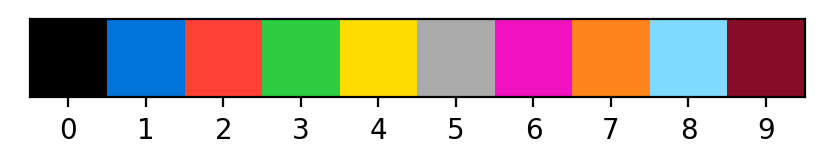

In [3]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()
    

In [4]:
num2color = ["black", "blue", "red", "green", "yellow", "gray", "magenta", "orange", "sky", "brown"]
color2num = {c: n for n, c in enumerate(num2color)}

In [11]:
all_solutions = solve_all_tasks(6, training='training')
# print(list(all_solutions.keys()))
for key, value in all_solutions.items():
    print(key)
    print(value[0])
    print()

3c9b0459.json
defaultdict(<function tree at 0x105b53510>, {'rotate_90': defaultdict(<function tree at 0x105b53510>, {'rotate_90': defaultdict(<function tree at 0x105b53510>, {'image': defaultdict(<function tree at 0x105b53510>, {})})})})

4c4377d9.json
defaultdict(<function tree at 0x105b53510>, {'concat_down': defaultdict(<function tree at 0x105b53510>, {'l': defaultdict(<function tree at 0x105b53510>, {'rotate_90': defaultdict(<function tree at 0x105b53510>, {'rotate_90': defaultdict(<function tree at 0x105b53510>, {'mirror': defaultdict(<function tree at 0x105b53510>, {'image': defaultdict(<function tree at 0x105b53510>, {})})})})}), 'r': defaultdict(<function tree at 0x105b53510>, {'image': defaultdict(<function tree at 0x105b53510>, {})})})})

6150a2bd.json
defaultdict(<function tree at 0x105b53510>, {'rotate_90': defaultdict(<function tree at 0x105b53510>, {'rotate_90': defaultdict(<function tree at 0x105b53510>, {'image': defaultdict(<function tree at 0x105b53510>, {})})})})

67

In [9]:
def check(task, imgTree):
    pred_func = lambda x: compute(imgTree, Image(x)).matrix
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(3, n, figsize=(4*n,12), dpi=50)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    fig_num = 0
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        t_pred = pred_func(t_in)
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        axs[2][fig_num].imshow(t_pred, cmap=cmap, norm=norm)
        axs[2][fig_num].set_title(f'Train-{i} pred')
        axs[2][fig_num].set_yticks(list(range(t_pred.shape[0])))
        axs[2][fig_num].set_xticks(list(range(t_pred.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        t_pred = pred_func(t_in)
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        axs[2][fig_num].imshow(t_pred, cmap=cmap, norm=norm)
        axs[2][fig_num].set_title(f'Test-{i} pred')
        axs[2][fig_num].set_yticks(list(range(t_pred.shape[0])))
        axs[2][fig_num].set_xticks(list(range(t_pred.shape[1])))
        fig_num += 1

3c9b0459.json
4c4377d9.json
6150a2bd.json
67a3c6ac.json
68b16354.json
6d0aefbc.json
6fa7a44f.json
74dd1130.json
8be77c9e.json
9dfd6313.json
a416b8f3.json
c9e6f938.json
ed36ccf7.json


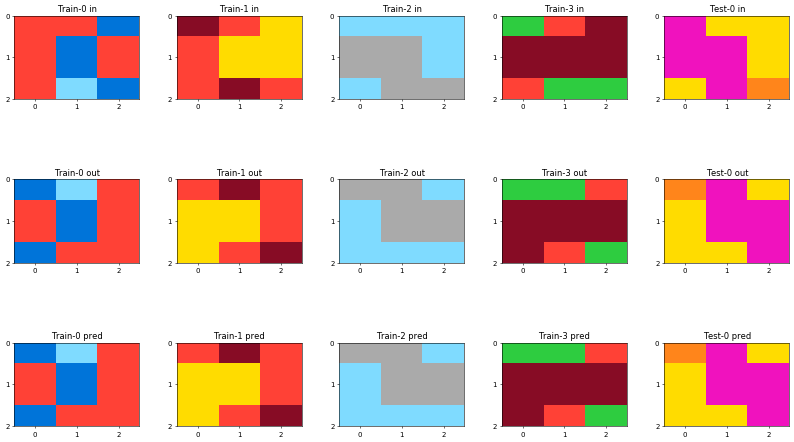

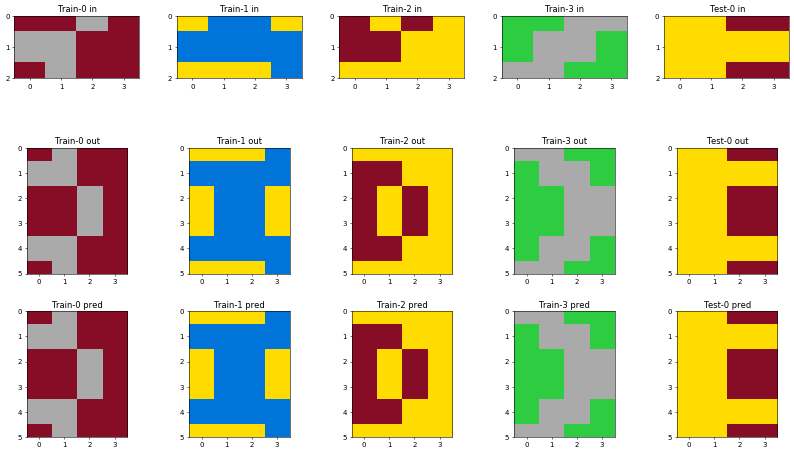

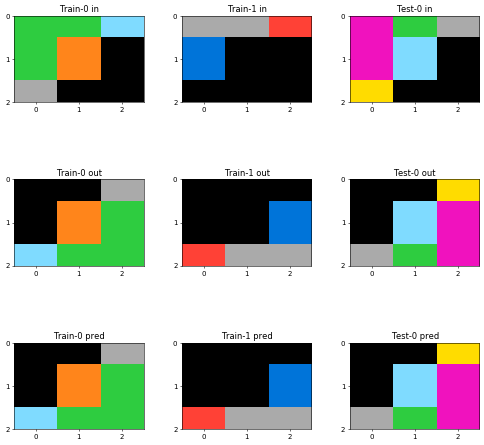

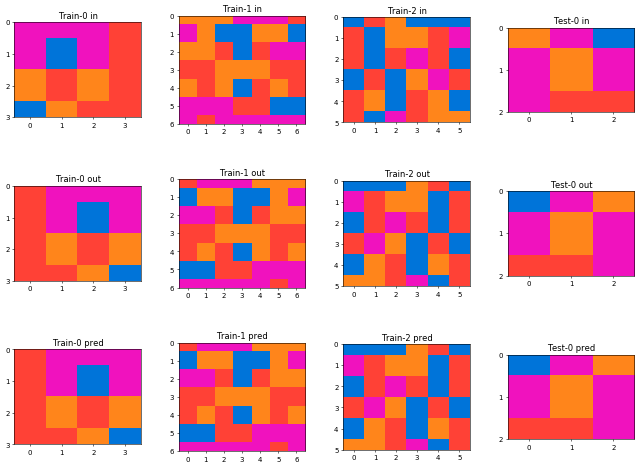

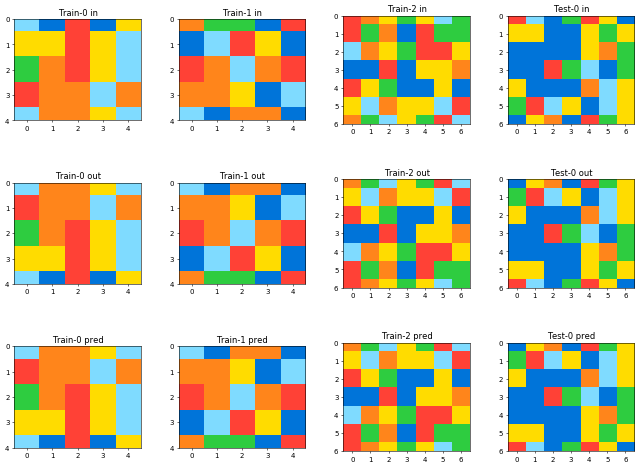

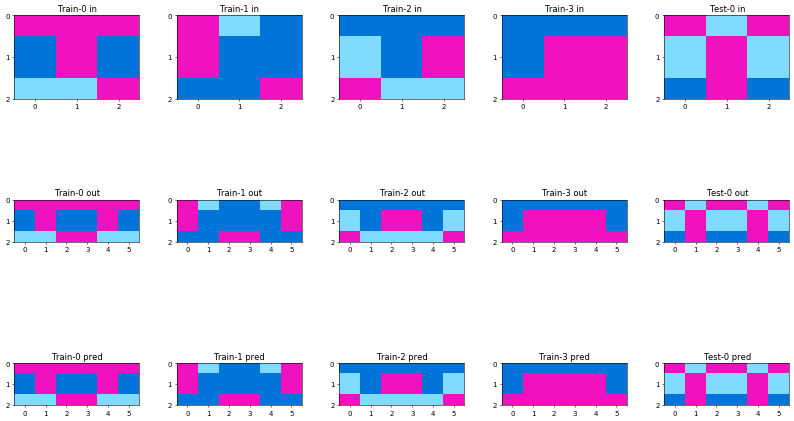

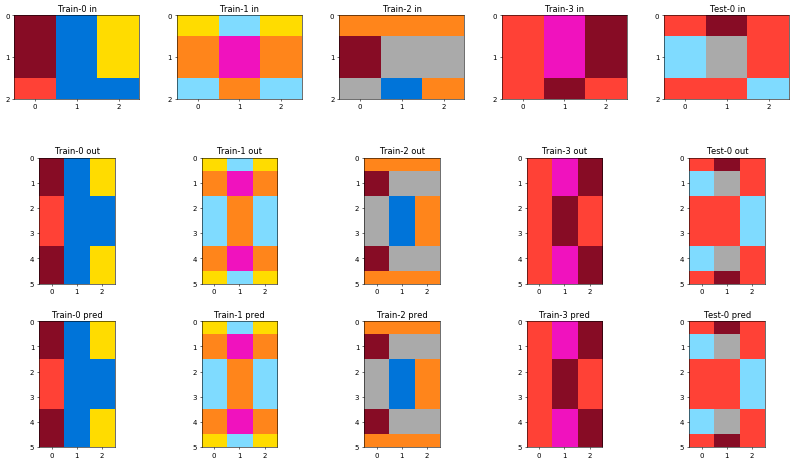

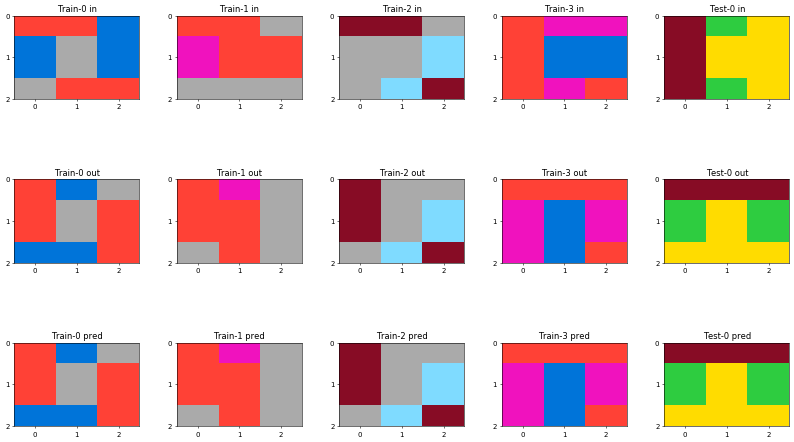

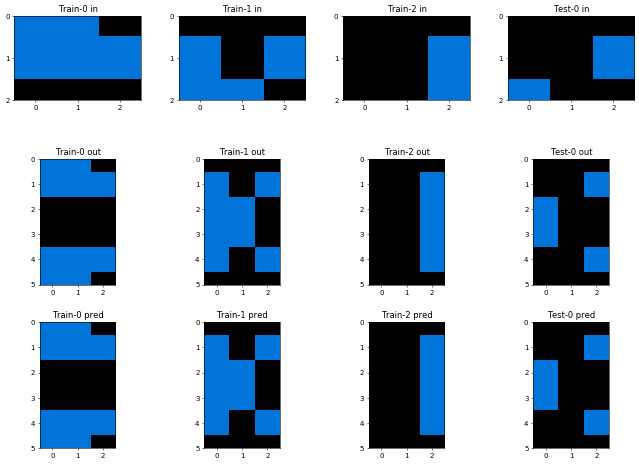

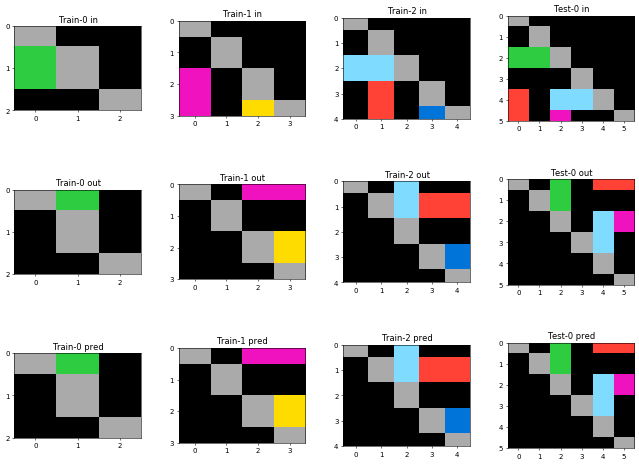

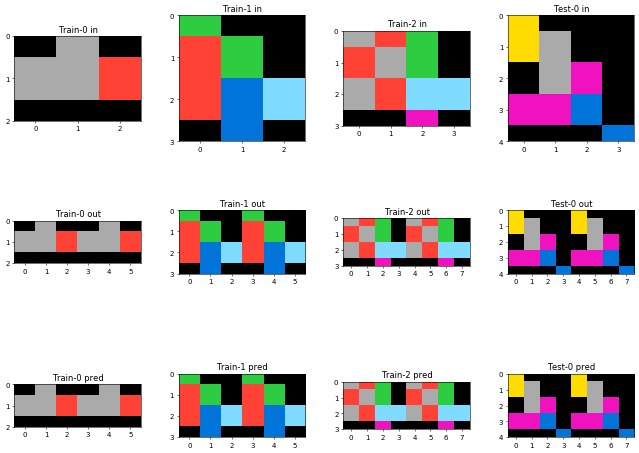

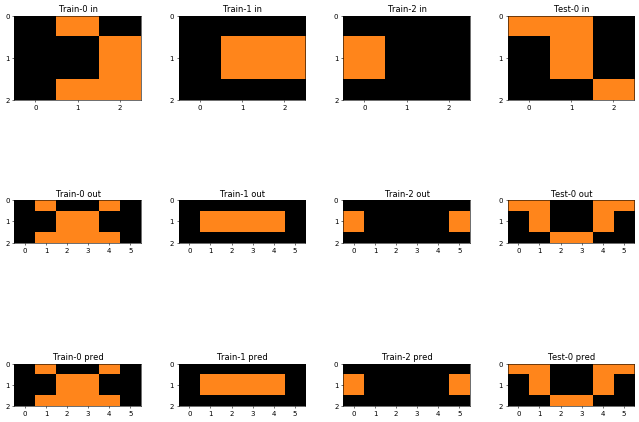

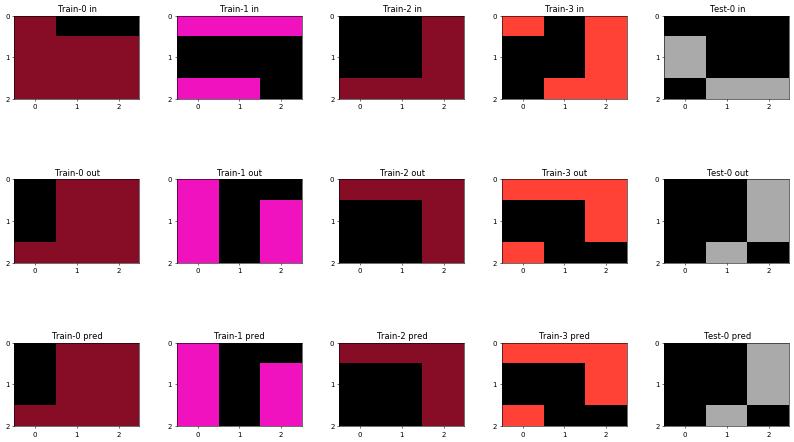

In [12]:
for key in all_solutions:
    print(key)
    task = get_data(str(training_path / key))
    check(task, all_solutions[key][0])